In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data set

df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [4]:
#drop irrelevant columns

df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [5]:
#check for duplicates using user id then drop the column since its also an irrelevant column

duplicates = df.duplicated(subset = 'user id')
print(df[duplicates])

Empty DataFrame
Columns: [user id, test group, converted, total ads, most ads day, most ads hour]
Index: []


In [6]:
#No duplicates 
#Drop user id column. 

#drop irrelevant columns

df.drop('user id', axis = 1, inplace = True)
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [7]:
#check the data in the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [8]:
#explore data in the columns further
#'total ads' is numerical,  'most ads hour' is also numerical but very specific since its time in 24 hour clock format
#other columns are categorical variables

df_columns = df[['test group', 'converted', 'most ads day', 'most ads hour']]

for i in df_columns.columns:
    print(i, ":", df_columns[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


In [9]:
#Get the count of the unique categories

df_columns.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

### Univariate Analysis
- visualize/analyse each variable o its own

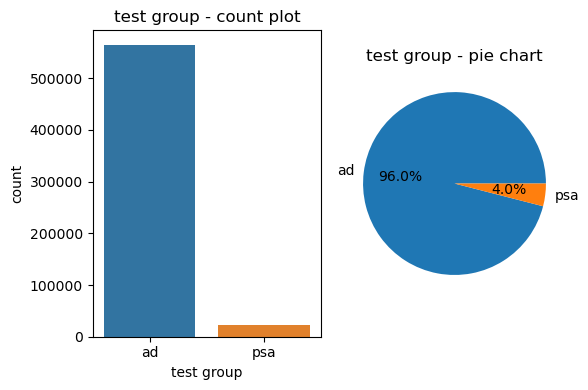

In [10]:
#Create plots next to one another

#'test group'
plt.figure(figsize = (6, 4))

#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x = 'test group', data = df_columns)
plt.title(f'test group - count plot')

#pie chart
plt.subplot(1, 2, 2)
count = df_columns['test group'].value_counts()
plt.pie(count, labels = count.index, autopct = '%1.1f%%')
plt.title(f'test group - pie chart')

plt.tight_layout()

plt.show()

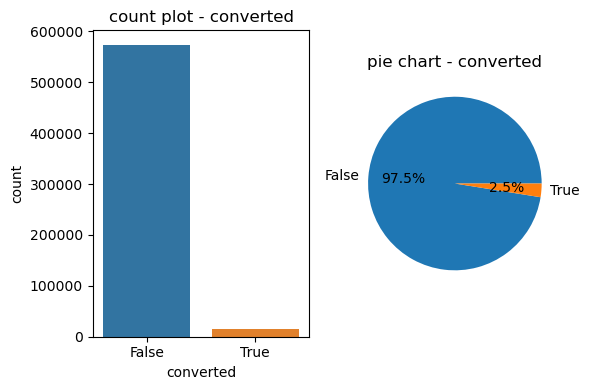

In [11]:
#'converted'

plt.figure(figsize = (6, 4))

#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x = 'converted', data = df_columns)
plt.title(f'count plot - converted')

#pie chart
plt.subplot(1, 2, 2)
count = df_columns['converted'].value_counts()
plt.pie(count, labels = count.index, autopct = '%1.1f%%')
plt.title(f'pie chart - converted')

plt.tight_layout()

plt.show()

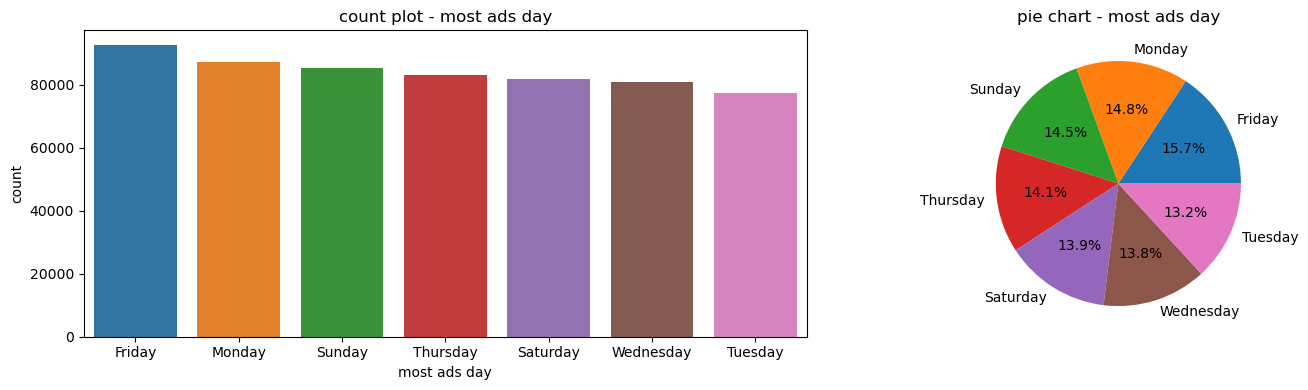

In [12]:
#most ads day

plt.figure(figsize = (15, 4))

#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x = 'most ads day', data = df_columns, order = df_columns['most ads day'].value_counts().index)
plt.title(f'count plot - most ads day')


#pie chart
plt.subplot(1, 2, 2)
count = df_columns['most ads day'].value_counts()
plt.pie(count, labels = count.index, autopct = '%1.1f%%')
plt.title(f'pie chart - most ads day')

plt.tight_layout()

plt.show()

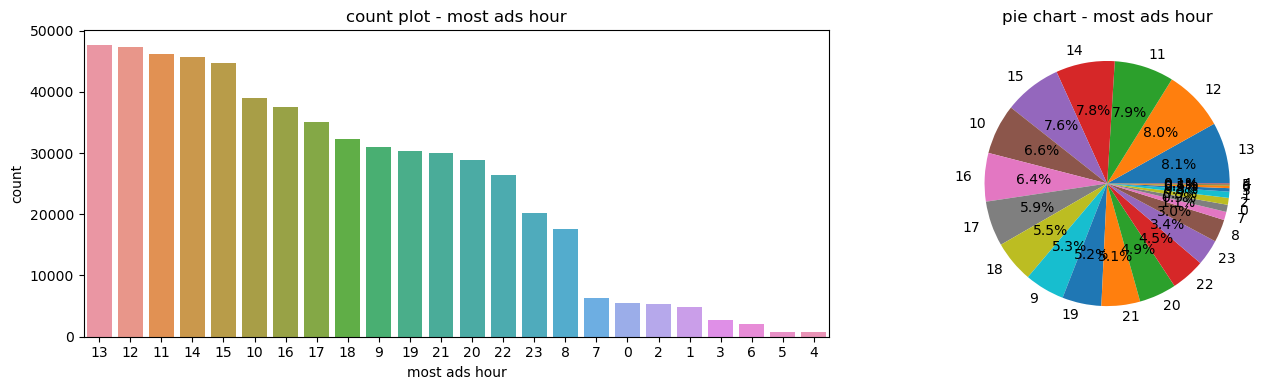

In [13]:
#most ads hour

plt.figure(figsize = (15, 4))

#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x = 'most ads hour', data = df_columns, order = df_columns['most ads hour'].value_counts().index)
plt.title(f'count plot - most ads hour')


#pie chart
plt.subplot(1, 2, 2)
count = df_columns['most ads hour'].value_counts()
plt.pie(count, labels = count.index, autopct = '%1.1f%%')
plt.title(f'pie chart - most ads hour')

plt.tight_layout()

plt.show()


#### 
- pie chart is useless in this case

#### Numerical analysis

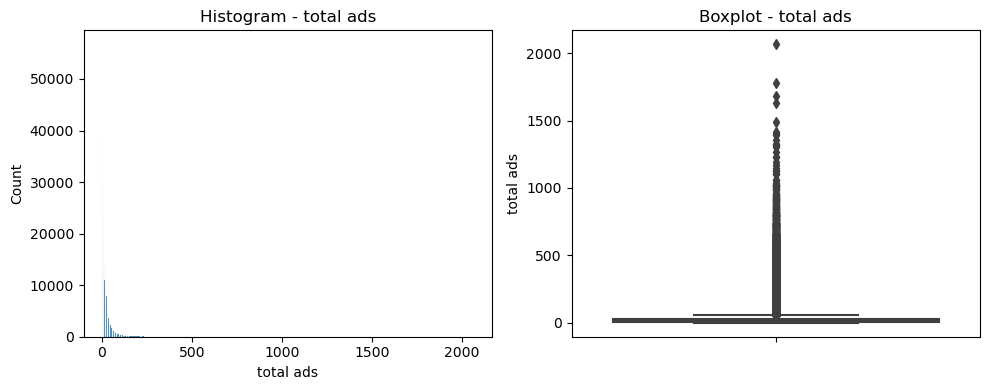

In [14]:
#total ads

plt.figure(figsize = (10, 4))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(x = 'total ads', data = df)
plt.title(f'Histogram - total ads')


#box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = 'total ads', data = df)
plt.title('Boxplot - total ads')

plt.tight_layout()

plt.show()

#### 
- Visuals do not give a lot of information for numerical column 

In [15]:
#summary statistics for total ads

df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

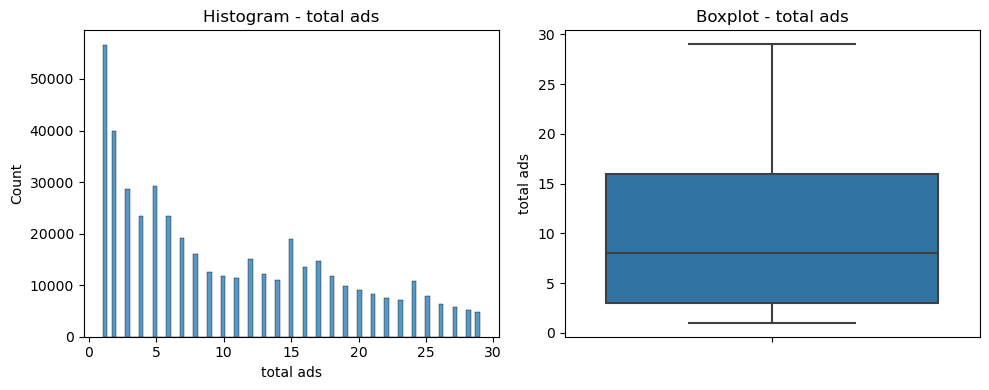

In [16]:
#Create another visual guided by the summary stats above
#75% of data is below 27

#total ads

plt.figure(figsize = (10, 4))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(x = 'total ads', data = df[df['total ads'] < 30])
plt.title(f'Histogram - total ads')


#box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = 'total ads', data = df[df['total ads'] < 30])
plt.title('Boxplot - total ads')

plt.tight_layout()

plt.show()

##### 
- For 75% of the data the average number of ads that were shown is approx 8

### Bivariate analysis
- compare each column with the target variable. converted is the target variable

converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


<Axes: xlabel='test group'>

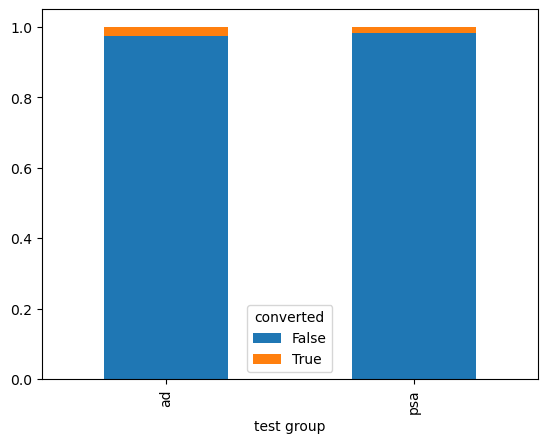

In [17]:
#cross tables and their visuals

#test group
ct1_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
print(ct1_test_group)

ct1_test_group.plot.bar(stacked = True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

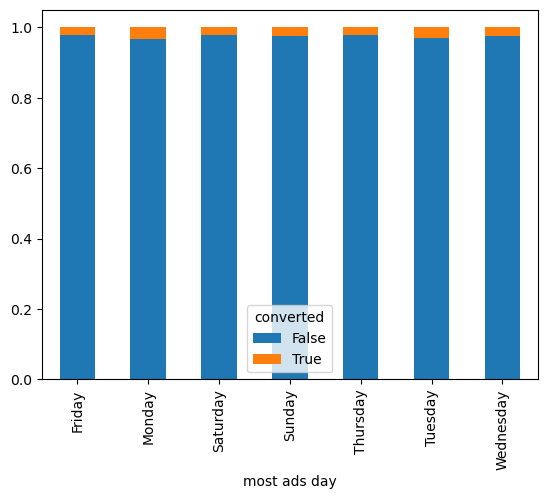

In [18]:
#most ads day
ct2_ads_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct2_ads_day.sort_values(by = True, ascending = False))

ct2_ads_day.plot.bar(stacked = True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

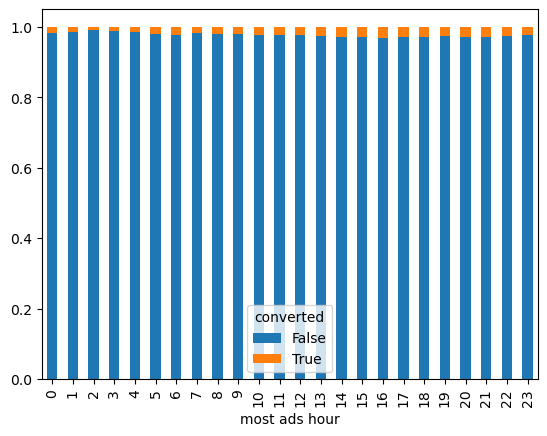

In [19]:
#most ads day
ct2_ads_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct2_ads_hour.sort_values(by = True, ascending = False))

ct2_ads_hour.plot.bar(stacked = True)

<Axes: xlabel='converted', ylabel='total ads'>

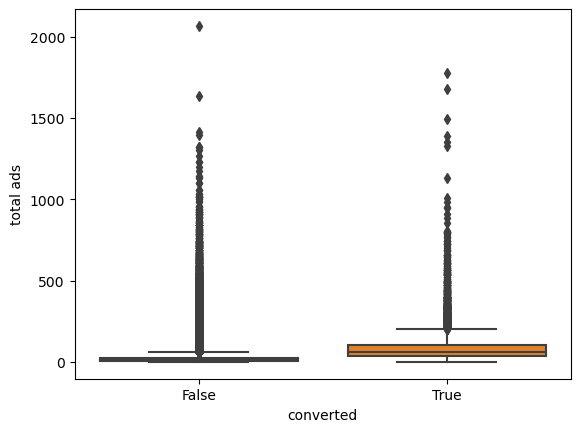

In [20]:
#use box plots for total ads since the data is varied 

sns.boxplot(x = 'converted', y = 'total ads', data = df)

<Axes: xlabel='converted', ylabel='total ads'>

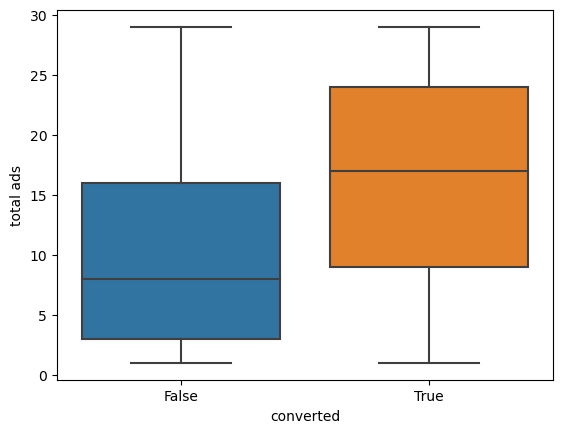

In [21]:
#visualise the day with the 75% as seen earlier

sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 30])

## Statistical Tests

In [22]:
from scipy.stats import chi2_contingency
alpha = 0.05

for i in df_columns.columns:
    if i != 'converted':
        
        #Create a contigency table from a cross_tab
        contingency_table = pd.crosstab(df_columns[i], df_columns['converted'])
        
        #chi-squared test calculation
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        #results
        print(f'\nChi-squared text for {i} vs. converted')
        print(f'Chi-squared value: {chi2}')
        print(f'p-value: {p}')
        
        #check of significance
        if p < alpha:
            print(f'The difference in conversion rate in {i} is statistically significant')
        else:
            print(f'The is no significant difference conversion rates across {i}')
            


Chi-squared text for test group vs. converted
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rate in test group is statistically significant

Chi-squared text for most ads day vs. converted
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rate in most ads day is statistically significant

Chi-squared text for most ads hour vs. converted
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rate in most ads hour is statistically significant


In [23]:
df_columns.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [24]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#1. check normality assumption
shapiro_true_status, shapiro_true_p_value = shapiro(df[df['converted'] == True]['total ads'])
shapiro_false_status, shapiro_false_p_value = shapiro(df[df['converted'] == False]['total ads'])

#results
print(f'Shapiro Wilk test for normality for the true group: p-value = {shapiro_true_p_value}')
print(f'Shapiro Wilk test for normality for the false group: p-value = {shapiro_false_p_value}')

#Equality  of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro Wilk test for normality for the true group: p-value = 0.0
Shapiro Wilk test for normality for the false group: p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
#2. Perform a suitable test
alpha = 0.05

if shapiro_true_p_value > alpha and shapiro_false_p_value > alpha and levene_p_value > alpha:
    
    #if assumption is met, ---> use ttest for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Independent two sample t-test: p-value = {t_p_value}')
else:
    
    #if assumption is not met ---> use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Mann-Whitney U test: p-value = {u_p_value}')

Mann-Whitney U test: p-value = 0.0
